In [ ]:
!wget -O image.jpg https://cdn.the-scientist.com/assets/articleNo/66864/aImg/35078/foresttb-m.jpg

In [ ]:
!wget -O image1.jpg https://cellphones.com.vn/sforum/wp-content/uploads/2018/08/87953117-2018-glitch-text-broadcasting-concept--600x600.jpg

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
import progressbar
import time

In [ ]:
class FourierTransform:
  def __init__(self):
    widgets = ['Computing ', progressbar.Percentage(), progressbar.Bar(), progressbar.ETA()]
    self.pbar = progressbar.ProgressBar(widgets=widgets)
    self.count = 0
    self.is2D = False

  def dft1D(self, f):
    fx = np.array(f).reshape(-1,1)
    M = len(fx)
    u = np.arange(M, dtype=np.float32).reshape(-1, 1)
    x = np.arange(M, dtype=np.float32).reshape(1, -1)
    W = np.exp(-2j* np.pi * u * x / M)
    # if self.is2D:
    #   self.count += 1
    #   self.pbar.update(self.count)
    return W.dot(fx).reshape(f.shape)
  
  def fft(self, f):
    x = np.asarray(f, dtype=float)
    N = f.shape[0]
    if N % 2 != 0 or N <= 2:
      return self.dft1D(f)
    else:
      X_even = self.fft(f[::2])
      X_odd = self.fft(f[1::2])
      W = np.exp(-2j * np.pi * np.arange(N) / N)
      return np.concatenate([X_even + W[:int(N/2)] * X_odd,
                              X_even + W[int(N/2):] * X_odd])
  
  def idft1D(self, f, c=False):
    fx = np.array(f).reshape(-1,1)
    M = len(fx)
    u = np.arange(M, dtype=np.float32).reshape(-1, 1)
    x = np.arange(M, dtype=np.float32).reshape(1, -1)
    W = np.exp(2j* np.pi * u * x / M)
    if self.is2D:
      self.count += 1
      self.pbar.update(self.count)
    return 1. / M * W.dot(fx).reshape(f.shape)

  
  def dft2D(self, img, fft=True):
    self.count = 0
    # self.pbar.init()
    # self.pbar.max_value=sum(img.shape)
    self.is2D = True
    start = time.time()
    if fft:
      func = self.fft
    else: func = self.dft1D
    self.horizontal_apply = np.apply_along_axis(func, 0, img)
    self.horizontal_apply_enhanced = self.horizontal_apply ** 0.1
    self.verticle_apply = np.apply_along_axis(func, 1, self.horizontal_apply_enhanced)
    self.verticle_apply_exhanced = np.log(1 + self.verticle_apply)
    # self.pbar.finish()
    end = time.time()
    print("\ndft's time: ", end - start)
    print('______________________________________\n')
    self.is2D = False
    return self.verticle_apply_exhanced
  
  def idft2D(self, img):
    self.count = 0
    self.pbar.init()
    self.pbar.max_value=sum(img.shape)
    self.is2D = True
    start = time.time()
    img = np.exp(img) - 1
    img = np.apply_along_axis(self.idft1D, 1, img)
    img = img ** (10)
    img = np.apply_along_axis(self.idft1D, 0, img)
    self.pbar.finish()
    end = time.time()
    print("\nidft's time: ", end - start)
    print('_______________________________________\n')
    self.is2D = False
    return img

  
  
  def shift(self, img):
    _img = np.ones_like(img)
    height, width = img.shape
    R1, R3 = img[ : height//2, : width//2], img[height//2 :, width//2 :]
    R2, R4 = img[ : height//2, width//2 :], img[height//2 :, : width//2]
    _img[ : height//2, : width//2], _img[height//2 :, width//2 :] = R3, R1
    _img[ : height//2, width//2 :], _img[height//2 :, : width//2] = R4, R2
    return _img
  


In [ ]:
fft = FourierTransform()
img = cv2.imread('image.jpg', 0)

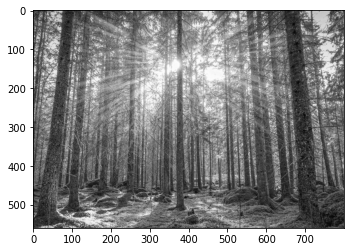

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
ret = fft.dft2D(img)
shifted = fft.shift(ret)
img_converted = fft.idft2D(ret)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
Computing   0%|                                                 |ETA:   0:00:37


dft's time:  2.2301528453826904
______________________________________



Computing 100%|#################################################|Time:  0:00:35



idft's time:  35.267762660980225
_______________________________________



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


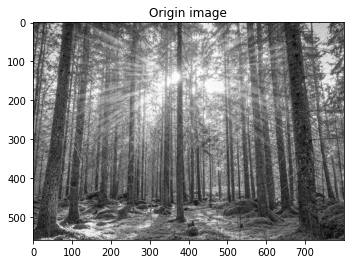

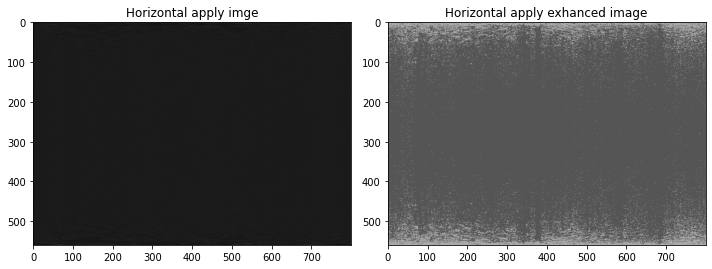

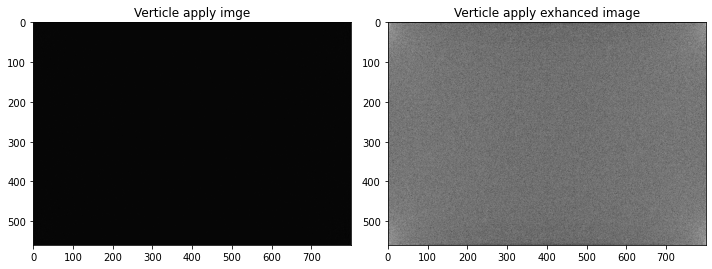

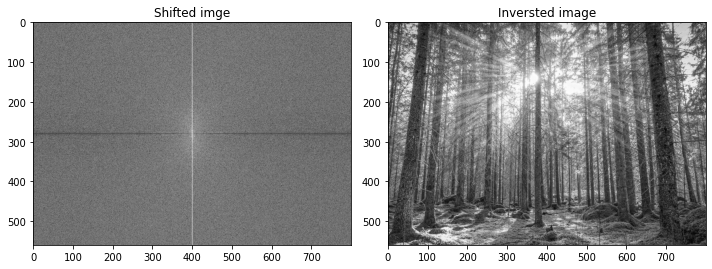

In [15]:
plt.imshow(np.int32(img), cmap='gray')
plt.title('Origin image')

fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(np.int32(fft.horizontal_apply), cmap='gray')
ax[0].set_title('Horizontal apply imge')
ax[1].imshow(np.int32(fft.horizontal_apply_enhanced), cmap='gray')
ax[1].set_title('Horizontal apply exhanced image')
fig.tight_layout()

fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(np.int32(fft.verticle_apply), cmap='gray')
ax[0].set_title('Verticle apply imge')
ax[1].imshow(np.int32(fft.verticle_apply_exhanced), cmap='gray')
ax[1].set_title('Verticle apply exhanced image')
fig.tight_layout()

fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].imshow(np.int32(shifted), cmap='gray')
ax[0].set_title('Shifted imge')
ax[1].imshow(np.int32(img_converted), cmap='gray')
ax[1].set_title('Inversted image')
fig.tight_layout()